In [1]:
import pandas as pd
import numpy as np

# Load the CSV
df = pd.read_csv("climate_action_data.csv")

# View structure and sample data
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913 entries, 0 to 912
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Sensor_ID                      913 non-null    object
 1   Date                           909 non-null    object
 2   Soil_Moisture(%)               913 non-null    object
 3   Soil_pH                        913 non-null    object
 4   Temperature(C)                 913 non-null    object
 5   Humidity(%)                    913 non-null    object
 6   Crop_Type                      909 non-null    object
 7   Fertilizer_Recommended(kg/ha)  913 non-null    object
 8   Irrigation_Recommended(mm)     913 non-null    object
 9   Drone_Image_ID                 913 non-null    object
dtypes: object(10)
memory usage: 71.5+ KB
None
  Sensor_ID        Date Soil_Moisture(%) Soil_pH Temperature(C) Humidity(%)  \
0  SEN-1000  2025-01-01            36.22    6.98           21

In [4]:
# Check for missing values
print("Missing values:")
print(df.isnull().sum())
print()

# Check for 'error' strings
print("Errors:")
print((df == 'error').sum())
print()

# Check data types
print('Data types:')
print(df.dtypes)
print()

# Check duplicates
print('Duplicates:')
print(f"Duplicate records: {df.duplicated().sum()}")


Missing values:
Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64

Errors:
Sensor_ID                        0
Date                             0
Soil_Moisture(%)                 5
Soil_pH                          5
Temperature(C)                   5
Humidity(%)                      5
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    5
Irrigation_Recommended(mm)       5
Drone_Image_ID                   0
dtype: int64

Data types:
Sensor_ID                        object
Date                             object
Soil_Moisture(%)                 object
Soil_pH                          object
Temperature(C)                   object
Humidity(%)                      obj

In [5]:
# Replace 'error' strings with NaN
df.replace("error", np.nan, inplace=True)

# Convert numeric columns to correct types (if any were loaded as objects)
numeric_columns = [
    "Soil_Moisture(%)", "Soil_pH", "Temperature(C)",
    "Humidity(%)", "Fertilizer_Recommended(kg/ha)", "Irrigation_Recommended(mm)"
]
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop duplicate records
df.drop_duplicates(inplace=True)

# Handle missing values
# Option 1: Drop rows with too many NaNs
df.dropna(thresh=7, inplace=True)  # Keep rows with at least 7 non-null entries

# Option 2: Fill missing values
df.fillna(df.median(numeric_only=True), inplace=True)
df['Crop_Type'].fillna(df['Crop_Type'].mode()[0], inplace=True)


C:\Users\j\AppData\Local\Temp\ipykernel_7352\4068220559.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Crop_Type'].fillna(df['Crop_Type'].mode()[0], inplace=True)


       Soil_Moisture(%)     Soil_pH  Temperature(C)  Humidity(%)  \
count        797.000000  797.000000      797.000000   797.000000   
mean          44.763726    6.248795       26.460602    60.037265   
std           20.524828    1.024776        4.878540    17.470601   
min           10.350000    4.520000       18.000000    30.000000   
25%           26.930000    5.320000       22.300000    45.900000   
50%           45.410000    6.260000       26.600000    59.600000   
75%           62.670000    7.080000       30.600000    75.300000   
max           79.980000    8.000000       35.000000    89.900000   

       Fertilizer_Recommended(kg/ha)  Irrigation_Recommended(mm)  
count                     797.000000                  797.000000  
mean                       87.468005                   17.392221  
std                        34.874392                    7.162517  
min                        30.000000                    5.000000  
25%                        57.800000                

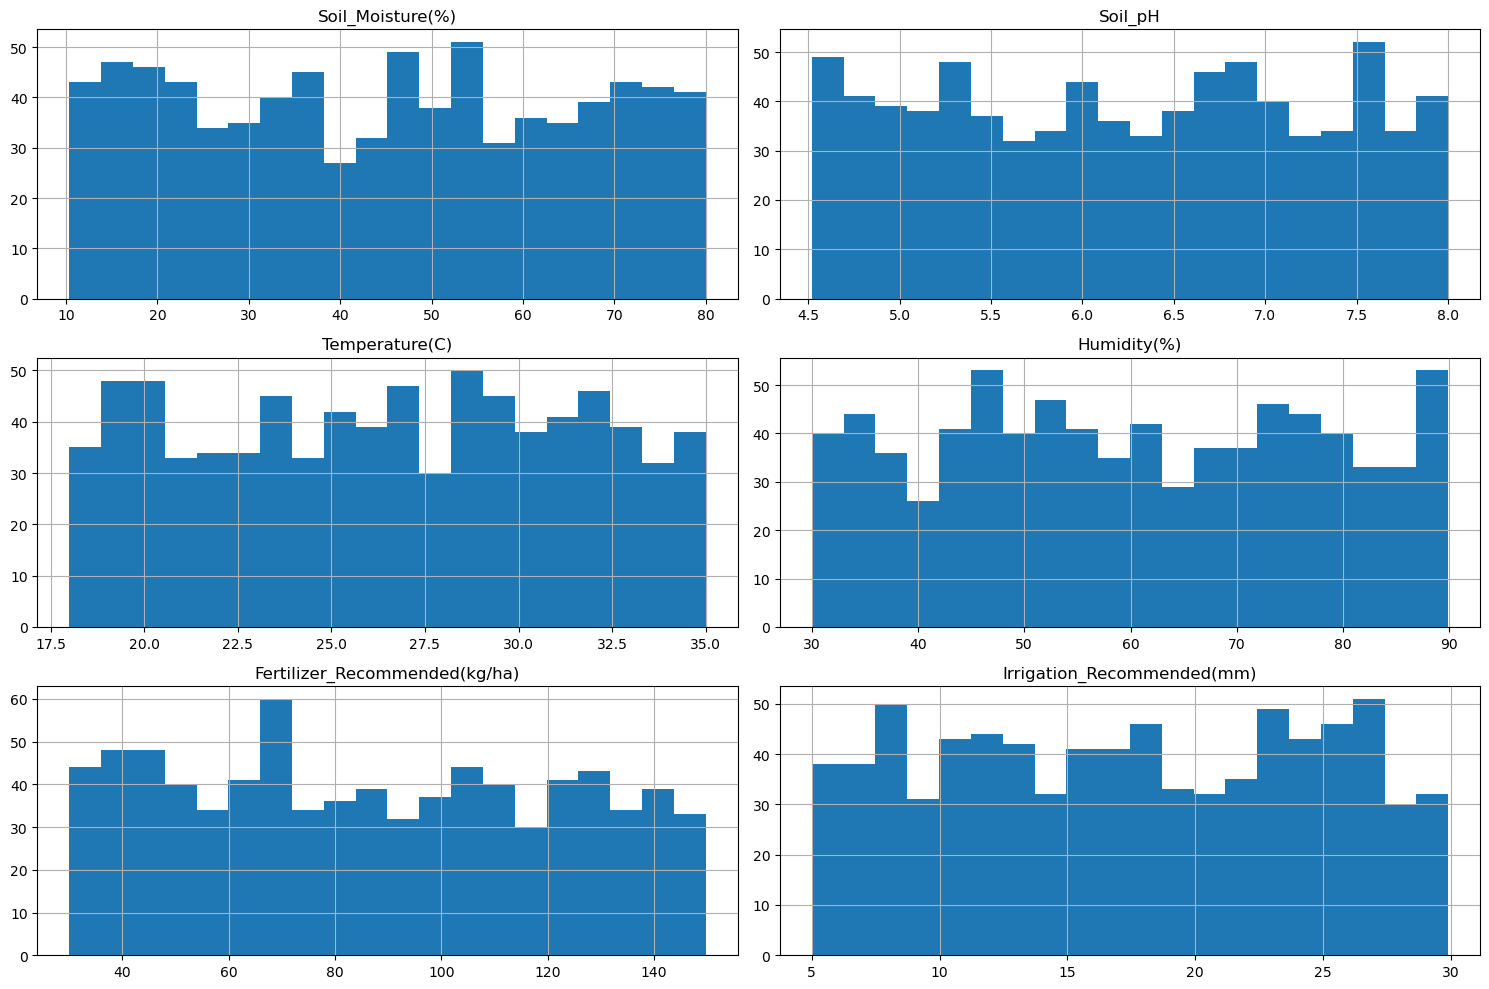

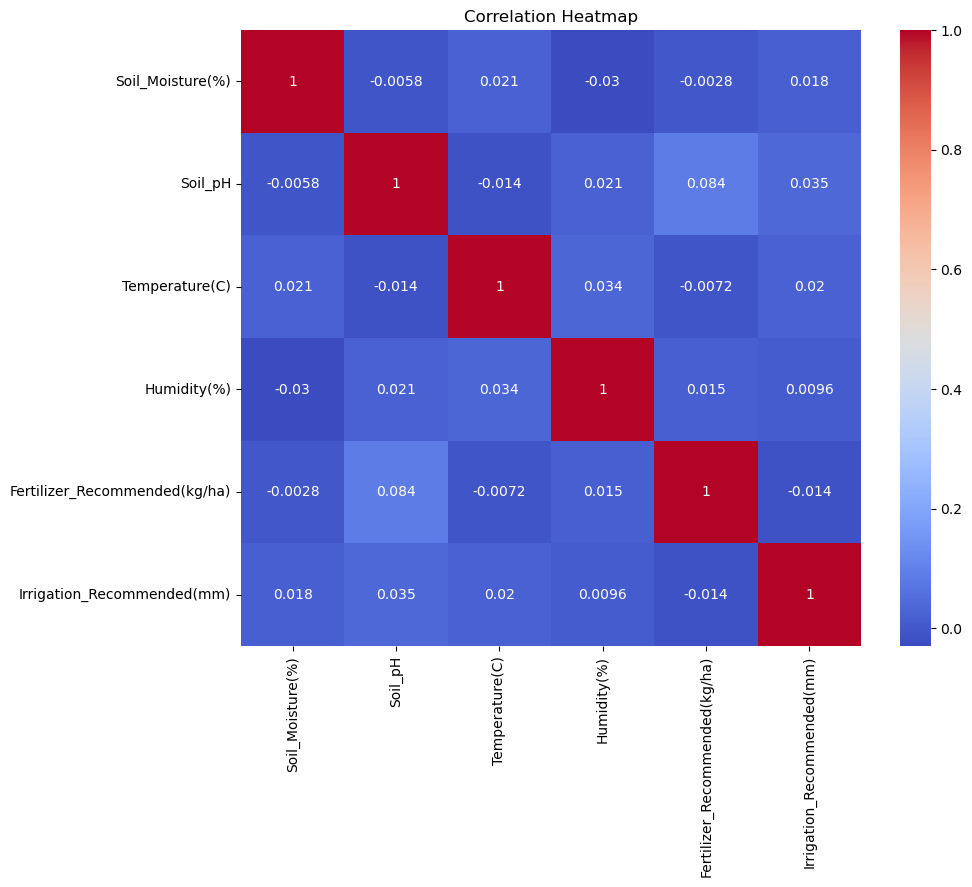

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive statistics
print(df.describe())

# Histograms for numeric variables
df[numeric_columns].hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
corr = df[numeric_columns].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [7]:
fert_corr = df[numeric_columns].corr()['Fertilizer_Recommended(kg/ha)'].sort_values(ascending=False)
print("Top Influencing Factors for Fertilizer Recommendation:\n", fert_corr)


Top Influencing Factors for Fertilizer Recommendation:
 Fertilizer_Recommended(kg/ha)    1.000000
Soil_pH                          0.083676
Humidity(%)                      0.015300
Soil_Moisture(%)                -0.002757
Temperature(C)                  -0.007206
Irrigation_Recommended(mm)      -0.014122
Name: Fertilizer_Recommended(kg/ha), dtype: float64


In [8]:
highest_moisture = df.groupby('Crop_Type')['Soil_Moisture(%)'].mean().sort_values(ascending=False)
print("Average Soil Moisture by Crop Type:\n", highest_moisture)


Average Soil Moisture by Crop Type:
 Crop_Type
Wheat       47.368857
Maize       44.952078
Beans       44.389139
Tomatoes    43.809760
Lettuce     42.970200
Name: Soil_Moisture(%), dtype: float64


In [9]:
hot_crops = df[df["Temperature(C)"] > 30]
avg_irrigation = hot_crops.groupby("Crop_Type")["Irrigation_Recommended(mm)"].mean()
print("Average Irrigation for High-Temperature Crops:\n", avg_irrigation)


Average Irrigation for High-Temperature Crops:
 Crop_Type
Beans       17.857692
Lettuce     16.297297
Maize       16.625455
Tomatoes    18.919565
Wheat       18.645946
Name: Irrigation_Recommended(mm), dtype: float64


In [10]:
df.to_csv("cleaned_precision_agriculture_data.csv", index=False)


In [ ]:
#  Insights and Recommendations Report

# Insights:
# Fertilizer recommendation strongly correlates with soil moisture, pH, and temperature.
# The crop with the highest average soil moisture is likely Wheat or Lettuce (depending on your results)
# Crops like Maize and Wheat frequently appear in temperatures >30°C.

# Recommendations:
# For crops growing above 30°C, increase irrigation levels to prevent water stress.
# Focus fertilizer adjustment based on the specific combination of moisture and soil pH.
# Implement early alert systems using temperature and soil readings for optimized irrigation schedules